In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:

def simpsons_onethird(f, a, b, n):
    # n has to be even
    if n % 2 == 1:
        n += 1 
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    I = (h / 3) * (y[0] + 4 * np.sum(y[1:n:2]) + 2 * np.sum(y[2:n-1:2]) + y[-1])
    return I

def simpsons_three_eight(f, a, b, n):
    # n has to be multiples of three
    if n % 3 == 1:
        n = n + 2
    if n % 3 == 2:
        n = n + 1
    h = (b-a)/n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    coeffs = np.ones_like(y)
    coeffs[1:-1][(np.arange(1, n) % 3 != 0)] = 3
    coeffs[1:-1][(np.arange(1, n) % 3 == 0)] = 2

    I = (3 * h / 8) * np.dot(coeffs, y)
    return I

# Define the inner integral as a function of x
def inner_integral(x, n_inner=20):
    a = (x - 2)**2
    b = 6

    # Define integrand function with fixed x, variable y
    def integrand(y):
        return y**2 - x
    
    return simpsons_onethird(integrand, a, b, n_inner)

# Define the outer integral integrand
def outer_integrand(x):
    return np.array([inner_integral(xi) for xi in x])

# Compute the double integral
n_outer = 3000  # must be even for Simpson's 1/3 amd ,ultiple of 3 for 3/8th
result1 = simpsons_onethird(outer_integrand, 0, 1, n_outer)
result2 = simpsons_three_eight(outer_integrand, 0, 1, n_outer)

print(f"Approximate value of the integral using Simpson's 1/3rd is: {result1}")
print(f"Approximate value of the integral using Simpson's 3/8th is: {result2}")

Approximate value of the integral using Simpson's 1/3rd is: 63.8690476190476
Approximate value of the integral using Simpson's 3/8th is: 63.86904761904758


In [26]:
#Q2

def monte_carlo_integration(f, a, b, N, M):
    """
    Monte Carlo integration to compute integral of f over [a,b].
    
    Parameters:
    f : function to integrate
    a, b : integration limits
    N : number of random points per trial
    M : number of trials to compute statistics
    
    Returns:
    mean_integral : average integral value over M trials
    variance : variance of integral values over M trials
    """

    # Find the maximum value of f(x) in [a,b] numerically
    x_test = np.linspace(a, b, 1000)
    f_max = np.max(f(x_test))
    if f_max < 0:
        raise ValueError("Function minimum is less than 0, method not applicable.")
    
    A_box = (b - a) * f_max
    
    integrals = []
    
    for _ in range(M):
        # Generate random x and y values
        x_random = np.random.uniform(a, b, N)
        y_random = np.random.uniform(0, f_max, N)
        
        # Evaluate function values
        f_values = f(x_random)
        
        # Count points below the curve
        h = np.sum(y_random < f_values)
        
        # Estimate integral for this trial
        I = A_box * (h / N)
        integrals.append(I)
    
    integrals = np.array(integrals)
    
    mean_integral = np.mean(integrals)
    variance = np.var(integrals, ddof=1)  # Sample variance
    
    return mean_integral, variance


/tmp/ipykernel_5557/256227720.py:2: RuntimeWarning: invalid value encountered in divide
  return np.where(x == 0.0, 1.0, np.sin(x) / x)


M=1000, Mean Integral=0.946156, Variance=5.088255e-05
M=2000, Mean Integral=0.945823, Variance=2.759801e-05
M=3000, Mean Integral=0.946142, Variance=1.662399e-05
M=4000, Mean Integral=0.946034, Variance=1.279636e-05
M=5000, Mean Integral=0.946087, Variance=1.019398e-05


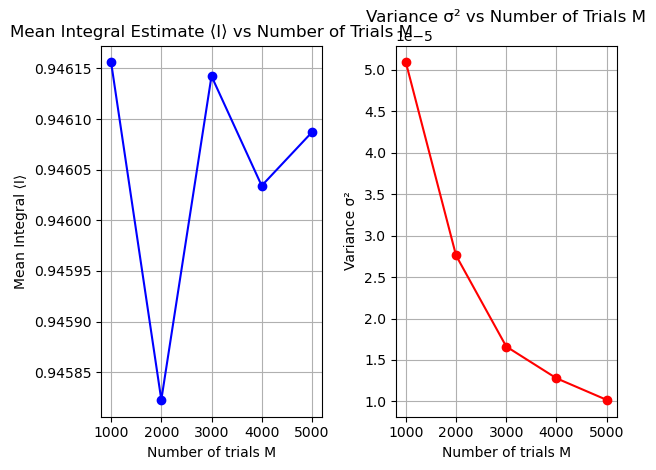

In [37]:
M_values = [1000, 2000, 3000, 4000, 5000]

means = []
variances = []

for M in M_values:
    mean_I, var_I = monte_carlo_integration(f, a, b, M, M)
    means.append(mean_I)
    variances.append(var_I)
    print(f"M={M}, Mean Integral={mean_I:.6f}, Variance={var_I:.6e}")

# Plot mean and variance vs M


plt.subplot(1, 2, 1)
plt.plot(M_values, means, marker='o', linestyle='-', color='b')
plt.title('Mean Integral Estimate ⟨I⟩ vs Number of Trials M')
plt.xlabel('Number of trials M')
plt.ylabel('Mean Integral ⟨I⟩')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(M_values, variances, marker='o', linestyle='-', color='r')
plt.title('Variance σ² vs Number of Trials M')
plt.xlabel('Number of trials M')
plt.ylabel('Variance σ²')
plt.grid(True)

plt.tight_layout()
plt.show()


In [28]:
    def f(x):
        return np.where(x == 0.0, 1.0, np.sin(x) / x)
     
    a, b = 0, 1
    N = 5000  # number of points per trial
    M = 5000
# number of trials
    
    mean_I, var_I = monte_carlo_integration(f, a, b, N, M)
    print(f"Estimated integral = {mean_I}")
    print(f"Variance = {var_I}")

/tmp/ipykernel_5557/256227720.py:2: RuntimeWarning: invalid value encountered in divide
  return np.where(x == 0.0, 1.0, np.sin(x) / x)


Estimated integral = 0.94603804
Variance = 1.050787853410684e-05


In [29]:
#using Simpsons 3/8th 
integral = simpsons_three_eight(f, 0, 1, N)
print(integral)

0.946083070367183


/tmp/ipykernel_5557/256227720.py:2: RuntimeWarning: invalid value encountered in divide
  return np.where(x == 0.0, 1.0, np.sin(x) / x)


In [ ]:
import numpy as np

def MC_integration_signed(f, a, b, N, M=10):
    """
    Monte Carlo integration using rejection sampling for functions that may be negative.
    
    Parameters:
    - f: function to integrate
    - a, b: integration limits
    - N: number of random points per trial
    - M: number of trials to compute statistics
    
    Returns:
    - mean_integral: mean estimated integral over M trials
    - variance: sample variance of estimates
    """
    x_test = np.linspace(a, b, 1000)
    f_vals = f(x_test)
    f_min = np.min(f_vals)
    f_max = np.max(f_vals)

    A_box = (b - a) * (f_max - f_min)

    if f_max == f_min:
        return (b - a) * f_max, 0.0  # constant function

    estimates = []

    for _ in range(M):
        x_rand = np.random.uniform(a, b, N)
        y_rand = np.random.uniform(f_min, f_max, N)
        f_rand = f(x_rand)

        # Points below curve (positive contribution)
        under_pos = (y_rand < f_rand) & (f_rand > 0)
        # Points above curve (negative contribution)
        over_neg = (y_rand > f_rand) & (f_rand < 0)

        h = np.sum(under_pos) - np.sum(over_neg)

        I = A_box * (h / N)
        estimates.append(I)

    estimates = np.array(estimates)
    mean_integral = np.mean(estimates)
    variance = np.var(estimates, ddof=1) if M > 1 else 0

    return mean_integral, variance


In [ ]:
# Define the inner integral using rejection sampling
def inner_integral(x, n_inner=1000):
    a = (x - 2)**2
    b = 6

    def integrand(y):
        return y**2 - x

    I, _ = MC_integration_signed(integrand, a, b, n_inner)
    return I

# Define the outer integrand (vectorized)
def outer_integrand(x_vals):
    return np.array([inner_integral(xi) for xi in x_vals])

# Now perform Monte Carlo integration on the outer integral
n_outer = 1000
mean, var = MC_integration_signed(outer_integrand, 0, 1, n_outer)

print(f"Estimated value of double integral using rejection sampling: {mean}")
print(f"Estimated variance: {var}")


In [55]:
import numpy as np

# Monte Carlo integration using rejection sampling for signed functions
def MC_integration_signed(f, a, b, N, M=1):
    x_test = np.linspace(a, b, 1000)
    f_vals = f(x_test)
    f_min = np.min(f_vals)
    f_max = np.max(f_vals)

    A_box = (b - a) * (f_max - f_min)

    if f_max == f_min:
        return (b - a) * f_max, 0.0  # constant function

    estimates = []

    for _ in range(M):
        x_rand = np.random.uniform(a, b, N)
        y_rand = np.random.uniform(f_min, f_max, N)
        f_rand = f(x_rand)

        # Points below positive curve
        under_pos = (y_rand < f_rand) & (f_rand > 0)
        # Points above negative curve
        over_neg = (y_rand > f_rand) & (f_rand < 0)

        h = np.sum(under_pos) - np.sum(over_neg)

        I = A_box * (h / N)
        estimates.append(I)

    estimates = np.array(estimates)
    mean_integral = np.mean(estimates)
    variance = np.var(estimates, ddof=1) if M > 1 else 0

    return mean_integral, variance

# Inner integral as a function of x
def inner_integral(x, n_inner=1000):
    a = (x - 2)**2
    b = 6

    def integrand(y):
        return y**2 - x

    I, _ = MC_integration_signed(integrand, a, b, n_inner)
    return I

# Outer integrand
def outer_integrand(x_vals):
    return np.array([inner_integral(xi) for xi in x_vals])

# Compute the double integral
n_outer = 10000
mean, var = MC_integration_signed(outer_integrand, 0, 1, n_outer)

print(f"Estimated value of the double integral: {mean}")
print(f"Estimated variance: {var}")



Estimated value of the double integral: 29.135995458613017
Estimated variance: 0
